In [370]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [5]:
ds = pd.read_csv("/Users/ana/ironhack_coding/datasets/speed-dating-experiment/speed_dating_data.csv", encoding = "Latin 1")

In [15]:
# all columns
print(ds.columns.values)

['iid' 'id' 'gender' 'idg' 'condtn' 'wave' 'round' 'position' 'positin1'
 'order' 'partner' 'pid' 'match' 'int_corr' 'samerace' 'age_o' 'race_o'
 'pf_o_att' 'pf_o_sin' 'pf_o_int' 'pf_o_fun' 'pf_o_amb' 'pf_o_sha' 'dec_o'
 'attr_o' 'sinc_o' 'intel_o' 'fun_o' 'amb_o' 'shar_o' 'like_o' 'prob_o'
 'met_o' 'age' 'field' 'field_cd' 'undergra' 'mn_sat' 'tuition' 'race'
 'imprace' 'imprelig' 'from' 'zipcode' 'income' 'goal' 'date' 'go_out'
 'career' 'career_c' 'sports' 'tvsports' 'exercise' 'dining' 'museums'
 'art' 'hiking' 'gaming' 'clubbing' 'reading' 'tv' 'theater' 'movies'
 'concerts' 'music' 'shopping' 'yoga' 'exphappy' 'expnum' 'attr1_1'
 'sinc1_1' 'intel1_1' 'fun1_1' 'amb1_1' 'shar1_1' 'attr4_1' 'sinc4_1'
 'intel4_1' 'fun4_1' 'amb4_1' 'shar4_1' 'attr2_1' 'sinc2_1' 'intel2_1'
 'fun2_1' 'amb2_1' 'shar2_1' 'attr3_1' 'sinc3_1' 'fun3_1' 'intel3_1'
 'amb3_1' 'attr5_1' 'sinc5_1' 'intel5_1' 'fun5_1' 'amb5_1' 'dec' 'attr'
 'sinc' 'intel' 'fun' 'amb' 'shar' 'like' 'prob' 'met' 'match_es'
 'attr1_s

In [256]:
len(ds[(ds.match == 1)])

1380

In [257]:
#this is not the total of people who had no matches, but rather the "dates" within the event without a match
len(ds[(ds.match == 0)])

6998

In [21]:
ds[(ds.match == 1)].head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
2     1  1.0       0    1       1     1     10         7       NaN     10   
3     1  1.0       0    1       1     1     10         7       NaN      5   
4     1  1.0       0    1       1     1     10         7       NaN      7   
8     1  1.0       0    1       1     1     10         7       NaN      8   
13    2  2.0       0    3       1     1     10         3       NaN      1   

    partner   pid  match  int_corr  samerace  age_o  race_o  pf_o_att  \
2         3  13.0      1      0.16         1   22.0     4.0      19.0   
3         4  14.0      1      0.61         0   23.0     2.0      30.0   
4         5  15.0      1      0.21         0   24.0     3.0      30.0   
8         9  19.0      1      0.28         0   28.0     2.0      50.0   
13        4  14.0      1     -0.21         1   23.0     2.0      30.0   

    pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  dec_o  attr_o  sinc_o  \
2       18.0      19.0      18.0      14.0      12.0      1    10.0    10.0   
3        5.0      15.0      40.0       5.0       5.0      1     7.0     8.0   
4       10.0      20.0      10.0      10.0      20.0      1     8.0     7.0   
8        0.0      25.0      10.0       0.0      15.0      1     7.0     7.0   
13       5.0      15.0      40.0       5.0       5.0      1     9.0     9.0   

    intel_o  fun_o  amb_o  shar_o  like_o  prob_o  met_o   age field  \
2      10.0   10.0   10.0    10.0    10.0    10.0    1.0  21.0   Law   
3       9.0    8.0    9.0     8.0     7.0     7.0    2.0  21.0   Law   
4       9.0    6.0    9.0     7.0     8.0     6.0    2.0  21.0   Law   
8       8.0    8.0    8.0     9.0     6.5     8.0    2.0  21.0   Law   
13      9.0    9.0    9.0     9.0     9.0     7.0    2.0  24.0   law   

    field_cd undergra mn_sat tuition  race  imprace  imprelig     from  \
2        1.0      NaN    NaN     NaN   4.0      2.0       4.0  Chicago   
3        1.0      NaN    NaN     NaN   4.0      2.0       4.0  Chicago   
4        1.0      NaN    NaN     NaN   4.0      2.0       4.0  Chicago   
8        1.0      NaN    NaN     NaN   4.0      2.0       4.0  Chicago   
13       1.0      NaN    NaN     NaN   2.0      2.0       5.0  Alabama   

   zipcode     income  goal  date  go_out  career  career_c  sports  tvsports  \
2   60,521  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
3   60,521  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
4   60,521  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
8   60,521  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
13  35,223  65,929.00   1.0   5.0     1.0     law       NaN     3.0       2.0   

    exercise  dining  museums  art  hiking  gaming  clubbing  reading   tv  \
2        8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
3        8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
4        8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
8        8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
13       7.0    10.0      8.0  6.0     3.0     5.0       8.0     10.0  1.0   

    theater  movies  concerts  music  shopping  yoga  exphappy  expnum  \
2       1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
3       1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
4       1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
8       1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
13      9.0     8.0       7.0    8.0       3.0   1.0       4.0     5.0   

    attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  attr4_1  sinc4_1  \
2      15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
3      15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
4      15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
8      15.0     20.0      20.0    15.0  

In [24]:
ds.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

   partner   pid  match  int_corr  samerace  age_o  race_o  pf_o_att  \
0        1  11.0      0      0.14         0   27.0     2.0      35.0   
1        2  12.0      0      0.54         0   22.0     2.0      60.0   
2        3  13.0      1      0.16         1   22.0     4.0      19.0   
3        4  14.0      1      0.61         0   23.0     2.0      30.0   
4        5  15.0      1      0.21         0   24.0     3.0      30.0   

   pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  dec_o  attr_o  sinc_o  \
0      20.0      20.0      20.0       0.0       5.0      0     6.0     8.0   
1       0.0       0.0      40.0       0.0       0.0      0     7.0     8.0   
2      18.0      19.0      18.0      14.0      12.0      1    10.0    10.0   
3       5.0      15.0      40.0       5.0       5.0      1     7.0     8.0   
4      10.0      20.0      10.0      10.0      20.0      1     8.0     7.0   

   intel_o  fun_o  amb_o  shar_o  like_o  prob_o  met_o   age field  field_cd  \
0      8.0    8.0    8.0     6.0     7.0     4.0    2.0  21.0   Law       1.0   
1     10.0    7.0    7.0     5.0     8.0     4.0    2.0  21.0   Law       1.0   
2     10.0   10.0   10.0    10.0    10.0    10.0    1.0  21.0   Law       1.0   
3      9.0    8.0    9.0     8.0     7.0     7.0    2.0  21.0   Law       1.0   
4      9.0    6.0    9.0     7.0     8.0     6.0    2.0  21.0   Law       1.0   

  undergra mn_sat tuition  race  imprace  imprelig     from zipcode  \
0      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
1      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
2      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
3      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
4      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   

      income  goal  date  go_out  career  career_c  sports  tvsports  \
0  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
1  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
2  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
3  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
4  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   

   exercise  dining  museums  art  hiking  gaming  clubbing  reading   tv  \
0       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
1       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
2       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
3       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
4       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   

   theater  movies  concerts  music  shopping  yoga  exphappy  expnum  \
0      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
1      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
2      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
3      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
4      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   

   attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  attr4_1  sinc4_1  \
0     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
1     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
2     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
3     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
4     15.0     

In [25]:
ds.tail()

iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
8373  552  22.0       1   44       2    21     22        14      10.0      5   
8374  552  22.0       1   44       2    21     22        13      10.0      4   
8375  552  22.0       1   44       2    21     22        19      10.0     10   
8376  552  22.0       1   44       2    21     22         3      10.0     16   
8377  552   NaN       1   44       2    21     22         2      10.0     15   

      partner    pid  match  int_corr  samerace  age_o  race_o  pf_o_att  \
8373       18  526.0      0      0.64         0   26.0     3.0      10.0   
8374       19  527.0      0      0.71         0   24.0     6.0      50.0   
8375       20  528.0      0     -0.46         0   29.0     3.0      40.0   
8376       21  529.0      0      0.62         0   22.0     4.0      10.0   
8377       22  530.0      0      0.01         0   22.0     4.0      20.0   

      pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  dec_o  attr_o  sinc_o  \
8373      10.0      30.0      20.0      10.0      15.0      1    10.0     5.0   
8374      20.0      10.0       5.0      10.0       5.0      0     6.0     3.0   
8375      10.0      30.0      10.0      10.0       NaN      0     2.0     1.0   
8376      25.0      25.0      10.0      10.0      20.0      1     5.0     7.0   
8377      20.0      10.0      15.0       5.0      30.0      1     8.0     8.0   

      intel_o  fun_o  amb_o  shar_o  like_o  prob_o  met_o   age  \
8373      3.0    2.0    6.0     5.0     6.0     1.0    NaN  25.0   
8374      7.0    3.0    7.0     2.0     2.0     2.0    2.0  25.0   
8375      2.0    2.0    2.0     1.0     2.0     1.0    2.0  25.0   
8376      5.0    5.0    3.0     6.0     6.0     4.0    2.0  25.0   
8377      7.0    7.0    7.0     7.0     8.0     5.0    2.0  25.0   

                 field  field_cd                         undergra mn_sat  \
8373  Climate Dynamics      18.0  Ecole Normale Suprieure, Paris    NaN   
8374  Climate Dynamics      18.0  Ecole Normale Suprieure, Paris    NaN   
8375  Climate Dynamics      18.0  Ecole Normale Suprieure, Paris    NaN   
8376  Climate Dynamics      18.0  Ecole Normale Suprieure, Paris    NaN   
8377  Climate Dynamics      18.0  Ecole Normale Suprieure, Paris    NaN   

     tuition  race  imprace  imprelig    from zipcode income  goal  date  \
8373     NaN   2.0      1.0       1.0  France  78,110    NaN   1.0   2.0   
8374     NaN   2.0      1.0       1.0  France  78,110    NaN   1.0   2.0   
8375     NaN   2.0      1.0       1.0  France  78,110    NaN   1.0   2.0   
8376     NaN   2.0      1.0       1.0  France  78,110    NaN   1.0   2.0   
8377     NaN   2.0      1.0       1.0  France  78,110    NaN   1.0   2.0   

      go_out                                             career  career_c  \
8373     1.0  assistant master of the universe (otherwise it...      15.0   
8374     1.0  assistant master of the universe (otherwise it...      15.0   
8375     1.0  assistant master of the universe (otherwise it...      15.0   
8376     1.0  assistant master of the universe (otherwise it...      15.0   
8377     1.0  assistant master of the universe (otherwise it...      15.0   

      sports  tvsports  exercise  dining  museums   art  hiking  gaming  \
8373     8.0       2.0       5.0    10.0     10.0  10.0     7.0     1.0   
8374     8.0       2.0       5.0    10.0     10.0  10.0     7.0     1.0   
8375     8.0       2.0       5.0    10.0     10.0  10.0     7.0     1.0   
8376     8.0       2.0       5.0    10.0     10.0  10.0     7.0     1.0   
8377     8.0       2.0       5.0    10.0     10.0  10.0     7.0     1.0   

      clubbing  reading   tv  theater  movies  concerts  music  shopping  \
8373       9.0      8.0  3.0      7.0     9.0      10.0   10.0       7.0   
8374       9.0      8.0  3.0      7.0     9.0      10.0   10.0       7.0   
8375       9.0      8.0  3.0      7.0     9.0      10.0   10.0       7.0   
8376       9.0      8.0  3.0      7.0   

In [26]:
ds.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

In [27]:
ds.shape

(8378, 195)

In [53]:
# selecting only relevant columns for this analysis 
ds2 = ds[["iid","gender","round", "order", "match", "int_corr", "date", "attr5_1","sinc5_1","intel5_1","fun5_1","amb5_1"]]

# changing column names
#new_columns = ["participant_id","gender","people_met", "match", "int_corr","self_attractive","self_sincere","self_intelligent","self_fun","self_ambitious"]

ds2.columns =  ["participant_id","gender","people_met","order", "match", "int_corr","date_freq","self_attractive","self_sincere","self_intelligent","self_fun","self_ambitious"]

ds2.head()


participant_id  gender  people_met  order  match  int_corr  date_freq  \
0               1       0          10      4      0      0.14        7.0   
1               1       0          10      3      0      0.54        7.0   
2               1       0          10     10      1      0.16        7.0   
3               1       0          10      5      1      0.61        7.0   
4               1       0          10      7      1      0.21        7.0   

   self_attractive  self_sincere  self_intelligent  self_fun  self_ambitious  
0              NaN           NaN               NaN       NaN             NaN  
1              NaN           NaN               NaN       NaN             NaN  
2              NaN           NaN               NaN       NaN             NaN  
3              NaN           NaN               NaN       NaN             NaN  
4              NaN           NaN               NaN       NaN             NaN

In [357]:
ds2.describe()

participant_id       gender   people_met        order        match  \
count     8378.000000  8378.000000  8378.000000  8378.000000  8378.000000   
mean       283.675937     0.500597    16.872046     8.927668     0.164717   
std        158.583367     0.500029     4.358458     5.477009     0.370947   
min          1.000000     0.000000     5.000000     1.000000     0.000000   
25%        154.000000     0.000000    14.000000     4.000000     0.000000   
50%        281.000000     1.000000    18.000000     8.000000     0.000000   
75%        407.000000     1.000000    20.000000    13.000000     0.000000   
max        552.000000     1.000000    22.000000    22.000000     1.000000   

          int_corr    date_freq  self_attractive  self_sincere  \
count  8220.000000  8281.000000      4906.000000   4906.000000   
mean      0.196010     5.006762         6.941908      7.927232   
std       0.303539     1.444531         1.498653      1.627054   
min      -0.830000     1.000000         2.000000      1.000000   
25%      -0.020000     4.000000         6.000000      7.000000   
50%       0.210000     5.000000         7.000000      8.000000   
75%       0.430000     6.000000         8.000000      9.000000   
max       0.910000     7.000000        10.000000     10.000000   

       self_intelligent     self_fun  self_ambitious  matches_number  
count       4906.000000  4906.000000     4906.000000          8378.0  
mean           8.284346     7.426213        7.617611             0.0  
std            1.283657     1.779129        1.773094             0.0  
min            3.000000     2.000000        1.000000             0.0  
25%            8.000000     6.000000        7.000000             0.0  
50%            8.000000     8.000000        8.000000             0.0  
75%            9.000000     9.000000        9.000000             0.0  
max           10.000000    10.000000       10.000000             0.0

In [54]:
#checking null values - to decide if confidence related rows should be removed or not
ds2.isnull().sum()

participant_id         0
gender                 0
people_met             0
order                  0
match                  0
int_corr             158
date_freq             97
self_attractive     3472
self_sincere        3472
self_intelligent    3472
self_fun            3472
self_ambitious      3472
dtype: int64

### Proportion of who got a match and who didn't

In [55]:
# people without any match vs people with 1+ match

# HERE I'M CALCULALTING WHO HAS HAD ONE OR MORE DATES

In [111]:
match_no = pd.pivot_table(ds2, index = "participant_id", values = "match", aggfunc = np.sum)

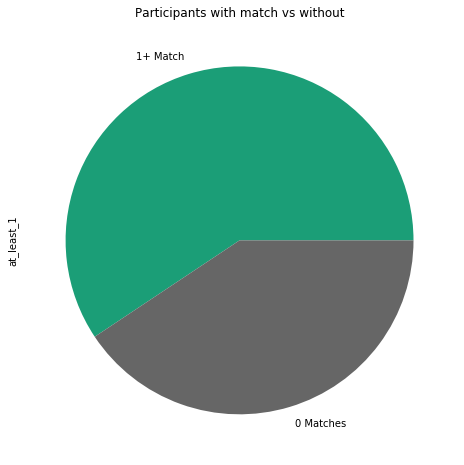

In [112]:
#create column for when a match at least
match_no["at_least_1"] = np.where(ds2["match"] > 1, "1+ Match","0 Matches")
match_no["at_least_1"].value_counts().plot(kind="pie", figsize=(8,8), title="Participants with match vs without",
                                   colormap="Dark2")

### Self Esteem / self confidence and likelihood of getting a match

In [ ]:
# of the people who had matches - what is their self-esteem level
# if self-esteem level is the sum of all the self attributes

In [ ]:
# this there's a lot of NaNs here, so just taking into account the other ones

In [365]:
# self_confidence of those who had a match or more
self_confidence_match = pd.pivot_table(ds2[(ds2["match"] > 0)], index = "participant_id", values = ["self_attractive", "self_sincere","self_intelligent",
                                                        "self_fun","self_ambitious"])
                                            

In [366]:
self_confidence_match

self_ambitious  self_attractive  self_fun  self_intelligent  \
participant_id                                                                
235                        9.0              6.0       9.0               9.0   
237                       10.0              8.0       7.0               9.0   
238                        9.0              9.0       9.0               9.0   
239                        7.0              7.0       7.0               8.0   
240                        4.0              3.0       3.0               3.0   
241                        8.0              8.0       8.0               8.0   
242                        8.0              7.0       7.0               8.0   
243                        6.0              7.0       6.0               9.0   
244                        9.0              7.0       8.0              10.0   
245                        6.0              6.0       7.0               9.0   
246                        4.0              7.0       6.0               6.0   
248                        7.0              5.0       8.0               6.0   
250                       10.0             10.0       9.0              10.0   
251                       10.0              8.0      10.0              10.0   
252                        7.0              9.0       7.0               8.0   
253                        9.0              8.0       9.0               9.0   
256                        7.0              7.0       6.0               8.0   
258                        6.0              6.0       7.0               8.0   
259                        9.0              7.0       8.0               8.0   
260                        9.0              6.0       7.0               9.0   
261                        9.0              5.0       6.0               8.0   
263                        8.0              8.0       9.0              10.0   
264                        6.0              8.0       8.0               9.0   
265                        7.0              6.0       4.0              10.0   
266                        5.0              7.0       7.0               7.0   
268                        8.0              9.0       7.0               8.0   
269                        8.0              7.0       4.0               7.0   
270                        5.0              5.0       7.0               8.0   
271                       10.0              9.0      10.0               9.0   
273                        8.0              6.0       6.0               9.0   
274                        8.0              7.0       9.0               9.0   
275                       10.0              9.0       5.0              10.0   
276                        7.0              5.0       6.0               9.0   
277                        5.0              4.0       8.0               8.0   
279                        8.0              7.0       7.0               8.0   
280                        7.0              5.0       5.0               9.0   
281                        7.0              7.0       4.0               9.0   
282                       10.0              7.0       9.0               9.0   
283                        9.0              9.0       7.0               8.0   
284                        8.0              7.0       7.0               6.0   
285                       10.0              8.0       8.0              10.0   
288                        6.0              5.0       6.0               7.0   
289                       10.0              4.0       9.0               8.0   
290                        7.0              5.0       5.0              10.0   
291                        8.0              6.0       7.0               9.0   
292                        9.0             10.0       6.0              10.0   
293                        9.0              7.0       8.0               9.0   
294                        7.0              9.0       5.0              10.0   
296                        8.0              6.0       6.0         

In [316]:
self_confidence_match["self_confidence_points"] = self_confidence_match.sum(axis=1)

In [317]:
self_confidence_match.head()

self_ambitious  self_attractive  self_fun  self_intelligent  \
participant_id                                                                
235                        9.0              6.0       9.0               9.0   
237                       10.0              8.0       7.0               9.0   
238                        9.0              9.0       9.0               9.0   
239                        7.0              7.0       7.0               8.0   
240                        4.0              3.0       3.0               3.0   

                self_sincere  self_confidence_points  
participant_id                                        
235                      9.0                    42.0  
237                     10.0                    44.0  
238                      9.0                    45.0  
239                     10.0                    39.0  
240                      5.0                    18.0

In [318]:
len(self_confidence_match)

255

In [161]:
self_confidence_no_match = pd.pivot_table(ds2[(ds2["match"] == 0)], index = "participant_id", values = ["self_attractive", "self_sincere","self_intelligent",
                                                        "self_fun","self_ambitious"])



In [164]:
self_confidence_no_match["self_confidence_points"] = self_confidence_no_match.sum(axis=1)
self_confidence_no_match.head()

self_ambitious  self_attractive  self_fun  self_intelligent  \
participant_id                                                                
234                       10.0              9.0       6.0               9.0   
235                        9.0              6.0       9.0               9.0   
236                        9.0              8.0      10.0               8.0   
237                       10.0              8.0       7.0               9.0   
238                        9.0              9.0       9.0               9.0   

                self_sincere  self_confidence_points  
participant_id                                        
234                      6.0                    80.0  
235                      9.0                    84.0  
236                      9.0                    88.0  
237                     10.0                    88.0  
238                      9.0                    90.0

In [165]:
len(self_confidence_no_match)

314

In [314]:
# trying to see how people with no match qualify themselves in general

#self_confidence_no_match.loc[:,self_confidence_no_match.columns != "self_confidence_points" ].plot.bar()

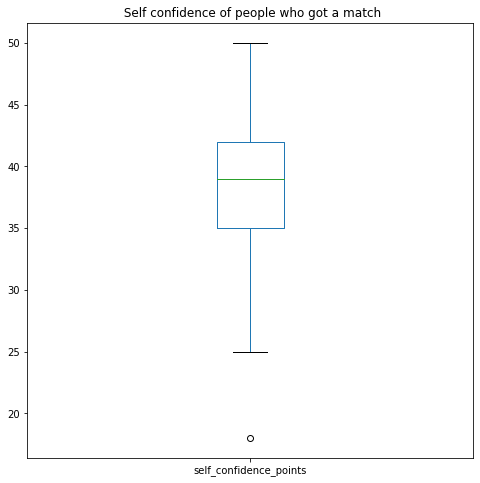

In [160]:
# boxplot

self_confidence_match["self_confidence_points"].plot.box(figsize=(8,8), title=" Self confidence of people who got a match")

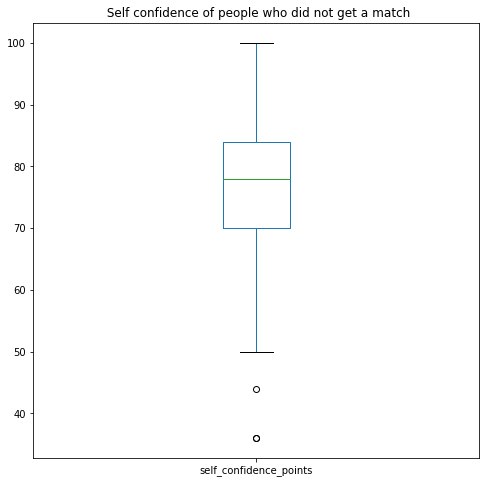

In [166]:
self_confidence_no_match["self_confidence_points"].plot.box(figsize=(8,8), title=" Self confidence of people who did not get a match")

In [ ]:
# the more confident you are the less likely you are of getting a date/match?

#### Plotting how self confidence in certain attributes will impact match/vs no match

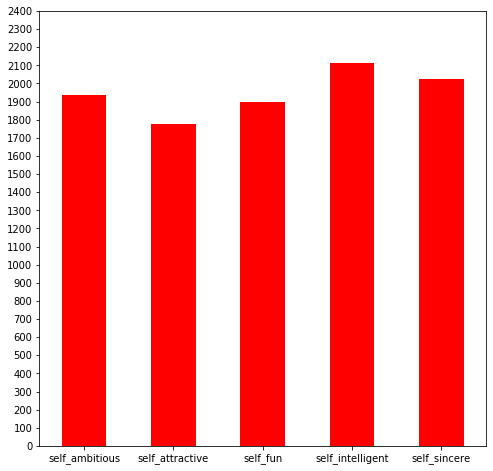

In [331]:
# WITH MATCH

self_confidence_match.loc[:,self_confidence_match.columns != "self_confidence_points" ].sum(axis=0).plot.bar(
    rot=0, figsize=(8,8), yticks = range(0,2500,100), color = "red")

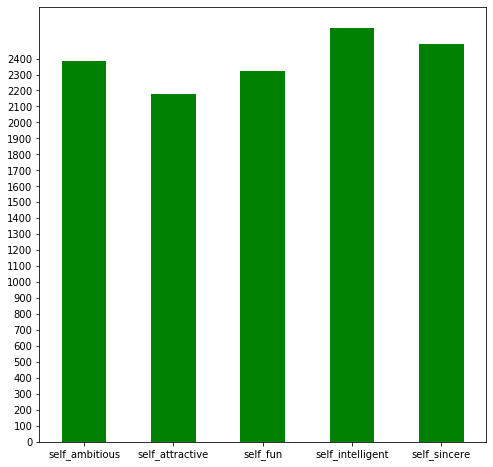

In [334]:
# NO MATCH

self_confidence_no_match.loc[:,self_confidence_no_match.columns != "self_confidence_points" ].sum(axis=0).plot.bar(
    rot=0, figsize=(8,8), yticks = range(0,2500,100), color = "green")

### How many matches per datespeeding event?

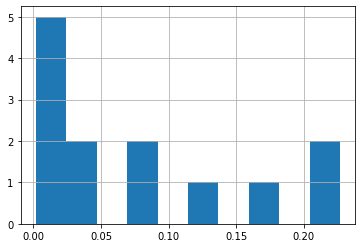

In [277]:
# percentage of how many matches people got  
match_no["match"].value_counts(normalize=True).hist(bins=10)

#majority got 1

In [282]:
match_no["match"].value_counts(normalize=True)*100

1     22.686025
2     21.234120
0     17.967332
3     11.615245
4      8.166969
5      7.078040
6      4.355717
8      3.085299
7      2.359347
9      0.544465
11     0.362976
10     0.362976
14     0.181488
Name: match, dtype: float64

In [289]:
#1380 people had only one match. this could be the sample for further analysis
len(ds2[(ds2.match == 1)])
one_match_sample = ds2[(ds2.match == 1)]


In [409]:
match_no

match
participant_id       
1                   4
2                   2
3                   0
4                   2
5                   2
6                   2
7                   2
8                   8
9                   7
10                  2
11                  0
12                  2
13                  4
14                  8
15                  3
16                  2
17                  1
18                  1
19                  9
20                  1
21                  0
22                  2
23                  3
24                  0
25                  0
26                  0
27                  2
28                  1
29                  2
30                  2
31                  4
32                  0
33                  0
34                  2
35                  5
36                  2
37                  2
38                  3
39                  1
40                  0
41                  0
42                  0
43                  1
44                  4
45                  4
46                  4
47                  1
48                  1
49                  6
50                  4
51                  1
52                  1
53                  1
54                  0
55                  3
56                  2
57                  1
58                  2
59                  0
60                  1
61                  2
62                  3
63                  1
64                  1
65                  0
66                  1
67                  2
68                  0
69                  2
70                  1
71                  3
72                  0
73                  0
74                  2
75                  2
76                  5
77                  6
78                  3
79                  3
80                  3
81                  3
82                  5
83                  2
84                  2
85                  1
86                  8
87                  2
88                  0
89                  2
90                  1
91                  8
92                  7
93                  4
94                  3
95                  1
96                  0
97                  5
98                  2
99                  8
100                 2
101                 0
102                 1
103                 1
104                 5
105                 8
106                 2
107                11
108                 4
109                 8
110                 4
111                 0
112                 6
113                 3
114                 1
115                 3
116                 4
117                 1
119                 5
120                 4
121                 0
122                 3
123                 0
124                 0
125                 7
126                 2
127                 4
128                 6
129                 3
130                 2
131                 0
132                 1
133                 0
134                 1
135                 2
136                 1
137                 1
138                 1
139                 0
140                 2
141                 1
142                 7
143                 0
144                 1
145                 0
146                 1
147                 5
148                 1
149                 5
150                 2
151                 2
152                 3
153                 3
154                 7
155                 1
156                 4
157                 1
158                 0
159                 2
160                 3
161                 2
162                 2
163                 3
164                 2
165                 3
166                 3
167                 3
168                 1
169                 5
170                 0
171                 4
172                 5
173                 5
174                 2
175                 3
176                 3
177                 0
178                 1
179                 1
180                 2
181                 5
182         

### Does order matter?

In [402]:
# number of matches per participant id. most people get 1 match
ds2.groupby("participant_id")["match"].sum().value_counts()

1     125
2     117
0      99
3      64
4      45
5      39
6      24
8      17
7      13
9       3
11      2
10      2
14      1
Name: match, dtype: int64

In [418]:
#pd.pivot_table(ds2, index = "participant_id")

#(ds2[(ds2.match == 1)])

#grouped = ds2.groupby("participant_id")

#grouped.apply(lambda x: x [x["match"]== 0])


date_freq  gender  int_corr     match  matches_number  order  \
participant_id                                                                 
1                     7.0       0  0.267000  0.400000               0    5.5   
2                     5.0       0  0.258000  0.200000               0    5.5   
3                     3.0       0 -0.136000  0.000000               0    5.5   
4                     5.0       0 -0.007000  0.200000               0    5.5   
5                     4.0       0 -0.079000  0.200000               0    5.5   
6                     3.0       0  0.224000  0.200000               0    5.5   
7                     5.0       0  0.067000  0.200000               0    5.5   
8                     5.0       0 -0.053000  0.800000               0    5.5   
9                     4.0       0  0.078000  0.700000               0    5.5   
10                    6.0       0  0.241000  0.200000               0    5.5   
11                    5.0       1  0.056000  0.000000               0    5.5   
12                    1.0       1  0.155000  0.200000               0    5.5   
13                    7.0       1  0.119000  0.400000               0    5.5   
14                    4.0       1 -0.057000  0.800000               0    5.5   
15                    4.0       1  0.052000  0.300000               0    5.5   
16                    5.0       1  0.274000  0.200000               0    5.5   
17                    3.0       1  0.243000  0.100000               0    5.5   
18                    6.0       1  0.153000  0.100000               0    5.5   
19                    1.0       1 -0.057000  0.900000               0    5.5   
20                    1.0       1 -0.078000  0.100000               0    5.5   
21                    7.0       0  0.110625  0.000000               0    8.5   
22                    6.0       0  0.090000  0.125000               0    8.5   
23                    1.0       0  0.025000  0.187500               0    8.5   
24                    6.0       0  0.036250  0.000000               0    8.5   
25                    5.0       0  0.089375  0.000000               0    8.5   
26                    5.0       0  0.066250  0.000000               0    8.5   
27                    6.0       0 -0.066875  0.125000               0    8.5   
28                    NaN       0       NaN  0.062500               0    8.5   
29                    6.0       0  0.087500  0.125000               0    8.5   
30                    7.0       0  0.098125  0.125000               0    8.5   
31                    4.0       0 -0.105625  0.250000               0    8.5   
32                    4.0       0  0.053750  0.000000               0    8.5   
33                    6.0       0 -0.078125  0.000000               0    8.5   
34                    6.0       0  0.125000  0.125000               0    8.5   
35                    6.0       0  0.055625  0.312500               0    8.5   
36                    5.0       0  0.118750  0.125000               0    8.5   
37                    6.0       0  0.105000  0.125000               0    8.5   
38                    4.0       0 -0.046875  0.187500               0    8.5   
39                    6.0       0  0.045000  0.062500               0    8.5   
40                    7.0       1 -0.062222  0.000000               0   10.0   
41                    6.0       1 -0.189444  0.000000               0   10.0   
42                    7.0       1  0.324444  0.000000               0   10.0   
43                    6.0       1 -0.071111  0.052632               0   10.0   
44                    3.0       1 -0.015556  0.210526               0   10.0   
45                    6.0       1 -0.130556  0.210526               0   10.0   
46                    6.0       1 -0.076667  0.210526               0   10.0   
47                    6.0       1  0.010556  0.052632               0   10.0   
48                    5.0       1  0.330556  0.052632               0   10.0   
49              

In [292]:
#people_met is the number of people at the event
#with_match[["people_met","order"]]

#pd.pivot_table(one_match_sample, index="people_met", values="order", aggfunc=lambda x: x.mode())

# is this well calculated? MODE?



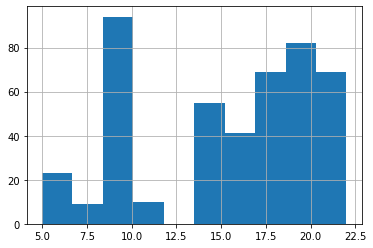

In [354]:
# it looks like in most events there were more than 20 people 
# attention: 
one_match_sample["people_met"].hist()

In [355]:
# focus on 18 people because that's the most common 
one_match_sample["people_met"].value_counts()

10    73
18    69
20    52
16    41
22    36
21    33
19    30
14    30
15    25
9     21
6     15
11    10
5      8
8      5
7      4
Name: people_met, dtype: int64

In [301]:
one_match_sample["people_met"]

2       10
3       10
4       10
8       10
13      10
18      10
33      10
38      10
43      10
48      10
53      10
58      10
63      10
68      10
71      10
72      10
73      10
74      10
75      10
77      10
78      10
79      10
81      10
82      10
83      10
84      10
85      10
86      10
88      10
92      10
98      10
117     10
118     10
120     10
127     10
128     10
129     10
130     10
131     10
133     10
134     10
135     10
136     10
137     10
138     10
140     10
147     10
148     10
157     10
158     10
168     10
177     10
180     10
181     10
183     10
184     10
185     10
186     10
187     10
188     10
189     10
197     10
220     16
221     16
235     16
236     16
237     16
302     16
306     16
318     16
332     16
333     16
353     16
359     16
368     16
369     16
370     16
375     16
414     16
417     16
429     16
430     16
433     16
434     16
437     16
449     16
451     16
460     16
468     16
481     16
482     16

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134cc1518>]],
      dtype=object)

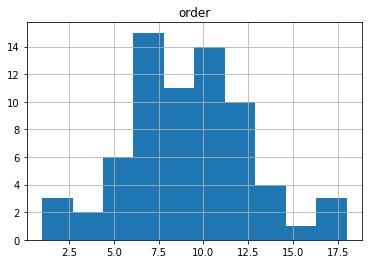

In [422]:
#histogram (distribution of order)
one_match_sample[(one_match_sample.people_met == 18)].hist(column= "order")


In [426]:
one_match_sample[(one_match_sample.people_met == 18)]["order"]

participant_id
76      9.800000
77     11.166667
78      6.666667
79      4.666667
80     11.333333
81     11.333333
82      9.800000
83      5.000000
84      4.500000
85      9.000000
86     12.750000
87     11.000000
89     13.000000
90      7.000000
91     10.125000
92      7.857143
93      9.750000
94     11.000000
95      6.000000
97     12.600000
98      4.500000
99     10.125000
100    13.500000
102    13.000000
103     7.000000
104     6.600000
105     9.375000
106    11.500000
107    10.454545
108    11.000000
109     8.500000
110     7.500000
341     6.333333
342     2.000000
343    11.000000
344    11.250000
345     9.750000
346     7.500000
348     2.000000
349     7.375000
350     9.000000
351     6.800000
352    11.333333
353    15.000000
354     8.375000
355     7.000000
356     4.000000
357     8.000000
358     3.000000
359     8.000000
360     8.000000
397    11.333333
398     7.166667
399     1.000000
400     8.500000
401     7.000000
402    18.000000
403     7.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x135da0e48>]],
      dtype=object)

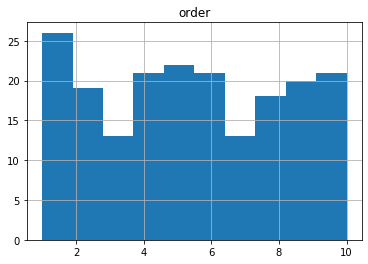

In [309]:
#is it different when people meet 10?
one_match_sample[(one_match_sample.people_met == 10)].hist(column= "order")

### Dating frequency

Codebook

How frequently do you go on dates ?
- Several times a week (1)
- Twice a week (2)
- Once a week(3)
- Twice a month (4)
- Once a month (5)
- Several times a year (6)
- Almost never (7)


In [ ]:
#If getting more dates improves the likelihood of a match

In [378]:
no_match = ds2[(ds2.match == 0)]
no_match["date_freq"].mean()

5.047563972820587

In [379]:
with_match["date_freq"].mean()

4.7998533724340176

In [437]:
with_match.groupby("participant_id")

In [438]:
pd.pivot_table(with_match, index = "participant_id")

date_freq  gender  int_corr  match  matches_number      order  \
participant_id                                                                  
1                     7.0       0  0.315000      1               0   7.500000   
2                     5.0       0 -0.050000      1               0   2.500000   
4                     5.0       0 -0.325000      1               0   5.500000   
5                     4.0       0 -0.025000      1               0   3.500000   
6                     3.0       0  0.290000      1               0   7.500000   
7                     5.0       0 -0.400000      1               0   4.500000   
8                     5.0       0 -0.068750      1               0   5.500000   
9                     4.0       0  0.102857      1               0   5.428571   
10                    6.0       0  0.170000      1               0   4.000000   
12                    1.0       1 -0.040000      1               0   6.500000   
13                    7.0       1  0.277500      1               0   5.500000   
14                    4.0       1 -0.087500      1               0   4.750000   
15                    4.0       1 -0.010000      1               0   6.000000   
16                    5.0       1  0.350000      1               0   9.500000   
17                    3.0       1  0.210000      1               0   5.000000   
18                    6.0       1  0.170000      1               0   5.000000   
19                    1.0       1 -0.046667      1               0   5.000000   
20                    1.0       1 -0.210000      1               0   2.000000   
22                    6.0       0 -0.115000      1               0   2.500000   
23                    1.0       0 -0.206667      1               0   8.333333   
27                    6.0       0  0.030000      1               0   3.500000   
28                    NaN       0       NaN      1               0   2.000000   
29                    6.0       0 -0.165000      1               0   4.500000   
30                    7.0       0  0.325000      1               0  12.000000   
31                    4.0       0 -0.102500      1               0   5.000000   
34                    6.0       0 -0.045000      1               0   2.000000   
35                    6.0       0  0.050000      1               0  12.400000   
36                    5.0       0 -0.235000      1               0   9.000000   
37                    6.0       0  0.130000      1               0   4.500000   
38                    4.0       0  0.053333      1               0  11.666667   
39                    6.0       0  0.120000      1               0   6.000000   
43                    6.0       1 -0.350000      1               0  12.000000   
44                    3.0       1 -0.120000      1               0   6.250000   
45                    6.0       1 -0.012500      1               0   7.000000   
46                    6.0       1  0.073333      1               0   8.000000   
47                    6.0       1  0.120000      1               0   7.000000   
48                    5.0       1  0.520000      1               0   3.000000   
49                    3.0       1 -0.100000      1               0   9.333333   
50                    6.0       1  0.102500      1               0  11.750000   
51                    5.0       1 -0.470000      1               0  17.000000   
52                    4.0       1 -0.050000      1               0   4.000000   
53                    6.0       1 -0.200000      1               0   5.000000   
55                    4.0       1  0.093333      1               0   8.333333   
56                    3.0       0  0.010000      1               0   6.500000   
57                    5.0       0 -0.340000      1               0   1.000000   
58                    NaN       0       NaN      1               0   3.000000   
60                    6.0       0  0.160000      1               0   8.000000   
61                    5.0       0 -0.095000    

In [384]:
alpha = 0.05
stat, p = ttest_ind(no_match.dropna()["date_freq"],with_match.dropna()["date_freq"])
print('t=%.3f, p=%.3f' % (stat, p))

p>alpha


# not too much apart?? WE can reject the null hypothesis that are tooo different

t=2.112, p=0.035


False

In [435]:
# finding correlation



participant_id     NaN
gender             NaN
people_met         NaN
order              NaN
match              NaN
int_corr           NaN
date_freq          NaN
self_attractive    NaN
self_sincere       NaN
self_intelligent   NaN
self_fun           NaN
self_ambitious     NaN
matches_number     NaN
dtype: float64

The t test tells you how significant the differences between groups are; In other words it lets you know if those differences (measured in means/averages) could have happened by chance.

In [428]:
ds2.sort_values(by=["participant_id", "order"])

participant_id  gender  people_met  order  match  int_corr  date_freq  \
6                  1       0          10      1      0      0.34        7.0   
7                  1       0          10      2      0      0.50        7.0   
1                  1       0          10      3      0      0.54        7.0   
0                  1       0          10      4      0      0.14        7.0   
3                  1       0          10      5      1      0.61        7.0   
5                  1       0          10      6      0      0.25        7.0   
4                  1       0          10      7      1      0.21        7.0   
8                  1       0          10      8      1      0.28        7.0   
9                  1       0          10      9      0     -0.36        7.0   
2                  1       0          10     10      1      0.16        7.0   
13                 2       0          10      1      1     -0.21        5.0   
15                 2       0          10      2      0      0.73        5.0   
14                 2       0          10      3      0      0.32        5.0   
18                 2       0          10      4      1      0.11        5.0   
19                 2       0          10      5      0      0.39        5.0   
12                 2       0          10      6      0      0.10        5.0   
16                 2       0          10      7      0      0.60        5.0   
17                 2       0          10      8      0      0.07        5.0   
11                 2       0          10      9      0      0.18        5.0   
10                 2       0          10     10      0      0.29        5.0   
29                 3       0          10      1      0     -0.47        3.0   
22                 3       0          10      2      0      0.09        3.0   
26                 3       0          10      3      0     -0.26        3.0   
27                 3       0          10      4      0      0.29        3.0   
21                 3       0          10      5      0     -0.14        3.0   
20                 3       0          10      6      0     -0.24        3.0   
23                 3       0          10      7      0     -0.04        3.0   
25                 3       0          10      8      0     -0.30        3.0   
24                 3       0          10      9      0     -0.14        3.0   
28                 3       0          10     10      0     -0.15        3.0   
37                 4       0          10      1      0      0.15        5.0   
31                 4       0          10      2      0     -0.18        5.0   
30                 4       0          10      3      0     -0.18        5.0   
33                 4       0          10      4      1     -0.18        5.0   
35                 4       0          10      5      0      0.37        5.0   
34                 4       0          10      6      0      0.21        5.0   
38                 4       0          10      7      1     -0.47        5.0   
39                 4       0          10      8      0     -0.19        5.0   
32                 4       0          10      9      0      0.05        5.0   
36                 4       0          10     10      0      0.35        5.0   
40                 5       0          10      1      0     -0.43        4.0   
43                 5       0          10      2      1      0.08        4.0   
45                 5       0          10      3      0      0.06        4.0   
44                 5       0          10      4      0     -0.16        4.0   
48                 5       0          10      5      1     -0.13        4.0   
49                 5       0          10      6      0     -0.06        4.0   
42                 5       0          10      7      0     -0.17        4.0   
46                 5       0          10      8      0     -0.05        4.0   
47                 5       0          10      9      0      0.07        4.0   
41                 5       0          10     10      0  